<a href="https://colab.research.google.com/github/omkarnitsureiitb/ML-Model-Implementations/blob/main/LogisticRegression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
## Author - Omkar Nitsure
### Email - omkarnitsure2003@gmail.com
### github - https://github.com/omkarnitsureiitb

In [38]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generating and plotting the Data

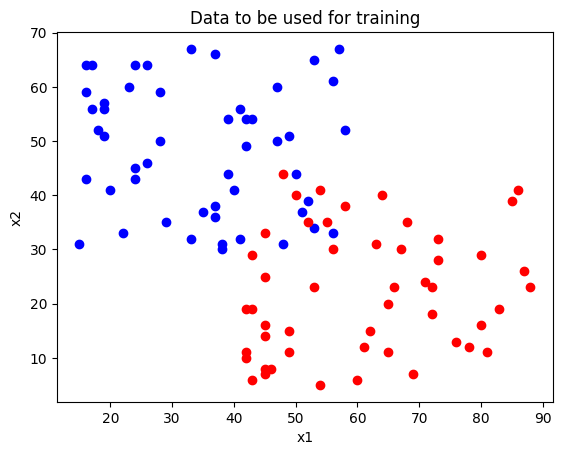

In [40]:
x1_1 = np.random.randint(15, 60, 50)
x2_1 = np.random.randint(30, 70, 50)
x1_0 = np.random.randint(40, 90, 50)
x2_0 = np.random.randint(5, 45, 50)

# we have to make a single vector for each of x1 and x2 by combining both the classes for training
x1 = np.hstack((x1_0, x1_1))
x2 = np.hstack((x2_0, x2_1))
# dividing both x1 and x2 by large number like 1000 to make sure that their sigmoid values don't saturate to either 0 or 1
x1 = x1/1000
x2 = x2/1000

# creating data
y0 = np.zeros(50)
y1 = np.ones(50)
data = np.hstack((y0, y1))

# plotting data
plt.scatter(x1_1, x2_1, color="blue")
plt.scatter(x1_0, x2_0, color="red")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data to be used for training')
plt.savefig("/content/drive/MyDrive/Plots/data.jpg")
plt.show()

## Sigmoid function

In [41]:
# sigmoid function
def sigmoid(x):
  value = 1/(1 + np.exp(-x))
  return value

## Cost function

In [42]:
# function to compute cost of Logistic Regression
def cost(model, data):
  cost = np.sum((-1)*(data*np.log(model) + (1 - data)*np.log(1 - model)))
  return np.round(cost, 2)

## Derivatives

In [43]:
# function to compute the derivative of cost with respect to theta1
def derivative_theta1(model, data, x1):
  dfdx = np.sum(x1*(model - data))
  return dfdx

In [44]:
# function to compute the derivative of cost with respect to theta2
def derivative_theta2(model, data, x2):
  dfdx = np.sum(x2*(model - data))
  return dfdx

In [45]:
# function to compute the derivative of cost with respect to theta0
def derivative_theta0(model, data):
  dfdx = np.sum((model - data))
  return dfdx

## Initialization

In [46]:
# random initialization of parameters and initial cost computation
theta1 = 1
theta2 = 2
theta0 = 3
theta0_iterations = []
theta1_iterations = []
theta2_iterations = []
model = sigmoid(theta1*x1 + theta2*x2 + theta0)
print("cost at iteration 0 : ", cost(model, data))

cost at iteration 0 :  159.59


## Learning rate

In [47]:
# learning rate, alpha
alpha = 0.08

## Gradient Descent

In [48]:
# main training loop using Gradient Descent
# cost is printed at every 100 iterations
iterations = 0
cost_i = 100

# main training loop
while cost_i > 25 or iterations <= 2000:
  iterations += 1

  # updating parameters
  theta1 = theta1 - alpha*derivative_theta1(model, data, x1)
  theta2 = theta2 - alpha*derivative_theta2(model, data, x2)
  theta0 = theta0 - alpha*derivative_theta0(model, data)

  model = sigmoid(theta1*x1 + theta2*x2 + theta0)

  # printing cost conditionally
  if(iterations % 100 == 0):
    cost_i  = cost(model, data)
    print("cost at iteration", iterations + 1," : ", cost_i)

cost at iteration 101  :  62.84
cost at iteration 201  :  57.5
cost at iteration 301  :  53.34
cost at iteration 401  :  49.87
cost at iteration 501  :  46.95
cost at iteration 601  :  44.47
cost at iteration 701  :  42.34
cost at iteration 801  :  40.5
cost at iteration 901  :  38.89
cost at iteration 1001  :  37.47
cost at iteration 1101  :  36.21
cost at iteration 1201  :  35.09
cost at iteration 1301  :  34.08
cost at iteration 1401  :  33.17
cost at iteration 1501  :  32.34
cost at iteration 1601  :  31.59
cost at iteration 1701  :  30.9
cost at iteration 1801  :  30.26
cost at iteration 1901  :  29.68
cost at iteration 2001  :  29.14
cost at iteration 2101  :  28.64
cost at iteration 2201  :  28.17
cost at iteration 2301  :  27.73
cost at iteration 2401  :  27.32
cost at iteration 2501  :  26.94
cost at iteration 2601  :  26.58
cost at iteration 2701  :  26.24
cost at iteration 2801  :  25.92
cost at iteration 2901  :  25.62
cost at iteration 3001  :  25.33
cost at iteration 3101

## Rescaling and printing the final parameters

In [49]:
# updating the values of theta1 and theta0 for plotting
theta1 = (-1000)*theta1/theta2
theta0 = (-1000)*theta0/theta2

#printing the final slope and constant values of the line
print("Equation of separating line is y = mx + c")
print("m =", np.round(theta1/1000, 2))
print("c =", np.round(theta0/1000, 2))

Equation of separating line is y = mx + c
m = 0.89
c = -0.01


## Plotting the final line

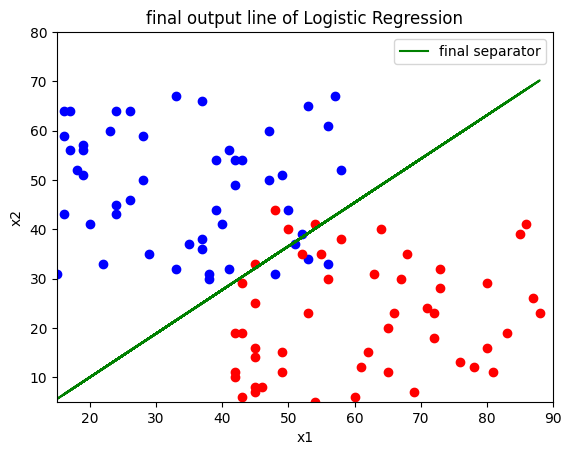

In [50]:
# equation of line
y = theta1*x1 + theta0

#plotting the data
plt.scatter(x1_1, x2_1, color="blue")
plt.scatter(x1_0, x2_0, color="red")

# plotting the final obtained line after training along with data
plt.plot(1000*x1, y, 'g-', label="final separator")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('final output line of Logistic Regression')
plt.legend()
plt.xlim((15, 90))
plt.ylim((5, 80))
plt.savefig("/content/drive/MyDrive/Plots/logisticRegression_separator.jpg")
plt.show()